Refer to the instructions on Canvas for more information.

"I have neither given nor received help on this assignment."

author: Phillip McDonough

In [1]:
'''
This cell loads the data from the .json file and stores it into:
 -- a list of dictionaries called tweetsList
 -- a pandas DataFrame called tweetsDF

You can assume that this cell will be executed before any of the visualization cells.

The cell includes the necessary imports for working with MatplotLib, and Seaborn
(as well as pandas and JSON files), but you can add others here as needed.

This cell will also display for use as a reference:
 -- the first tweet from tweetsList
 -- the first five tweets from tweetsDF
 
(This cell will also take a little while to run...)
'''

import json
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import pandas as pd

sns.set()

# Load dataset from the .json tweets file
with open('CovidTweets.json', 'r', encoding="utf-8") as infile:
    tweetsList = json.load(infile)

# Convert the dataset into a partially-flattened pandas DataFrame   
tweetsDF = pd.io.json.json_normalize(tweetsList, sep='_')

# Sample output
print("The first tweet from tweetsList is:\n")
pprint.pprint(tweetsList[0])    

print("\n\nThe first five tweets from tweetsDF are:")
tweetsDF.head()

<ipython-input-1-ff621baabb68>:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  tweetsDF = pd.io.json.json_normalize(tweetsList, sep='_')


The first tweet from tweetsList is:

{'favorite_count': 0,
 'lang': 'en',
 'location': None,
 'retweet_count': 1,
 'text': 'Incorrect. #COVID19  IFR is much lower than first assumed. It’s '
         'definitely in the range of a severe #flu! \n'
         'Paper from John Ioannidis, published by the #WHO. Total IFR of '
         '0.23%. 0.05% for people under the age for 70\n'
         'https://t.co/fZu1XTlnsY \n'
         '6/x https://t.co/y5nftIF3Ch',
 'timestamp': 'Sat Nov 07 21:14:49 +0000 2020',
 'tweet_entities': {'hashtags': [{'indices': [25, 33], 'text': 'COVID19'},
                                 {'indices': [114, 118], 'text': 'flu'}],
                    'user_mentions': [{'id': 1061607523504087040,
                                       'id_str': '1061607523504087040',
                                       'indices': [3, 12],
                                       'name': '𓅓Ramon',
                                       'screen_name': 'Rapataux'}]},
 'user': {'account_crea

,timestamp,text,retweet_count,favorite_count,lang,location,user_name,user_screen_name,user_followers_count,user_friends_count,user_favourites_count,user_statuses_count,user_verified,user_account_created,tweet_entities_hashtags,tweet_entities_user_mentions,location_type,location_coordinates
0,Sat Nov 07 21:14:49 +0000 2020,Incorrect. #COVID19 IFR is much lower than fi...,1,0,en,NaN,ZedAK,TrdisOprtr,97,20,6704,22765,False,Thu Aug 13 22:03:59 +0000 2020,"[{'text': 'COVID19', 'indices': [25, 33]}, {'t...","[{'screen_name': 'Rapataux', 'name': '𓅓Ramon',...",NaN,NaN
1,Sat Nov 07 21:14:49 +0000 2020,@HistoireSecrete ALERTE - 86 852 cas de #coron...,0,0,fr,NaN,Thierry,____Thierry____,1824,4972,114045,52635,False,Sun Sep 15 20:02:17 +0000 2013,"[{'text': 'coronavirus', 'indices': [40, 52]},...","[{'screen_name': 'HistoireSecrete', 'name': '#...",NaN,NaN
2,Sat Nov 07 21:14:49 +0000 2020,"Nous retiendrons les noms des #playmobils, #tr...",3,0,fr,NaN,PRODIGY ♥ PRODIGE ☮ Anti fascisme EM 🖕,tpmetadone21,2290,1086,535,62621,False,Wed Aug 03 11:36:53 +0000 2011,"[{'text': 'playmobils', 'indices': [46, 57]}, ...","[{'screen_name': 'LalobaRose', 'name': '🃏 Rosi...",NaN,NaN
3,Sat Nov 07 21:14:49 +0000 2020,"Congratulations, @JoeBiden. \n\nTogether, we h...",4412,0,en,NaN,Tim,russelltim151,2187,1100,329200,830105,False,Fri Nov 28 19:47:49 +0000 2014,"[{'text': 'ClimateEmergency', 'indices': [84, ...","[{'screen_name': 'FijiPM', 'name': 'Frank Bain...",NaN,NaN
4,Sat Nov 07 21:14:49 +0000 2020,🇷 ALERTE - 86 852 cas de #coronavirus ont été ...,258,0,fr,NaN,2spi,Rs3Ny,838,644,16386,13942,False,Sat Jan 04 21:03:16 +0000 2020,"[{'text': 'coronavirus', 'indices': [42, 54]}]","[{'screen_name': 'Mediavenir', 'name': 'Mediav...",NaN,NaN


1. The question I am trying to answer in this visualization is: Does status count effect the amount of retweets a user gets?
2. I chose a scatter plot because it allows me to visualize the overall relational trend between the two variables.
3. From this data, a user should learn that the amount of retweets a post gets doesn't depend on how many status updates are posted by a user. In fact, this graph suggests that users who have the least amount of status updates have the largest cluster of highly retweeted tweets in multiple ranges of retweet counts. While users with high status counts also recieved large retweet counts, they do not recieve as many retweets as those with small status counts. 

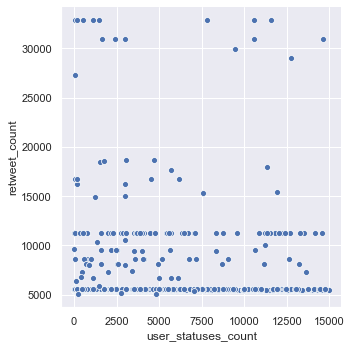

In [7]:
tweets = tweetsDF.loc[tweetsDF['user_statuses_count'] < 15000]
tweets = tweets.loc[tweets['retweet_count'] < 35000]
tweets = tweets.loc[tweets['retweet_count'] > 5000]
sns.relplot(x='user_statuses_count', y='retweet_count', data=tweets)

1. The question I am trying to answer in this visualization is: How often do people tweet in other languages compared to english?
2. For this visualization I chose to use a bar graph. I chose this because it is the best way to compare the different amounts of tweets in other languages.
3. From this data a user should learn that the overwhelming majority of tweets are posted in english. More over, people tweeted more about covid in french than in spanish, which is surprising considering twitter headquarters are in the US and South America is closer to it than France. In addition, there is a steep fall off of different language use after english, french, and spanish, suggesting the mojority of twitter users speak english, then french, and then spanish with many outliers after who barely using the app in their language.

Text(0, 0.5, 'Number of tweets')

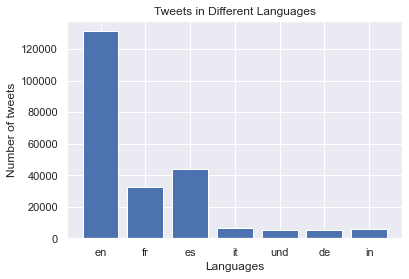

In [3]:
languages = {}

for lang in tweetsDF['lang']:
    if lang in languages:
        languages[lang] += 1
    else:
        languages[lang] = 1

langs = []
langAmount = []

for key in languages:
    if  4500 <= languages[key]:
        langs.append(key)
        langAmount.append(languages[key])

plt.bar(langs, langAmount)
plt.title('Tweets in Different Languages')
plt.xlabel('Languages')
plt.ylabel('Number of tweets')

1. The question I am trying to answer in this visualization is: Which covid-related hashtag is used the most?
2. I chose to use a line plot for this visualization because it shows the steep drop off of hashtag usage.
3. From this visualization, a user should learn that majority of people who tweet about covid are using the hashtag 'COVID19'. This is important information because if one were trying to get a message across to the most amount of people on twitter, they would want to use this hashtag over all others to have a greater chance of being seen.

Text(0, 0.5, 'Number of Uses')

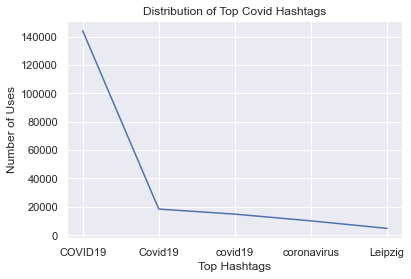

In [4]:
hashtags = {}


tagsList = tweetsDF['tweet_entities_hashtags']

for tag in tagsList:
    if len(tag) >= 1:
        for txt in tag:
            text = txt['text']
            if text in hashtags:
                hashtags[text] += 1
            else:
                hashtags[text] = 1
                
topFiveValues = sorted(hashtags, key=hashtags.get, reverse=True)[:5]
topFiveInts = []
for item in topFiveValues:
    topFiveInts.append(hashtags[item])
    
plt.plot(topFiveValues, topFiveInts) 
plt.title('Distribution of Top Covid Hashtags')
plt.xlabel('Top Hashtags')
plt.ylabel('Number of Uses')

1. The question I am trying to answer in this visualization is: At what hours do people tweet the most?
2. I chose a stem plot for this visualization because it helps to show a trend in the data, as well as clearly show which hours people are most on twitter.
3. From this visulalization, a user should learn that a tweet will be seen by more people if posted later in the day. The data shows an upward slope which peaks in the evening. This is important to know for someone who wants to get their message out, especially about covid, to the most amount of people, and clearly most people are on twitter in the evening around 7-8.

Text(0, 0.5, 'Amount of tweets')

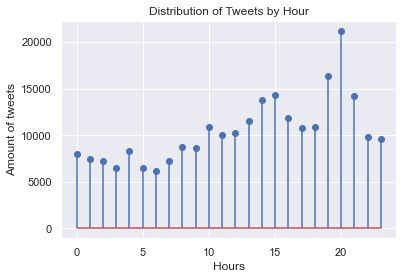

In [5]:
hours = {}

for tweet in tweetsList:
    hour = tweet['timestamp'][11:13]
    if hour in hours:
        hours[hour] += 1
    else:
        hours[hour] = 1
        


allHours = []
hoursCounts = []
        
for key in hours:
    allHours.append(int(key))
    hoursCounts.append(hours[key])
    

plt.stem(allHours, hoursCounts)
plt.title('Distribution of Tweets by Hour')
plt.xlabel('Hours')
plt.ylabel('Amount of tweets')
